In [24]:
#import library
import cv2
import numpy as np
import pandas as pd
import matplotlib as plt

In [25]:
# funtion onehot example have 3 classes 1 = [1,0,0] , 2 = [0,1,0] , 3 = [0,0,1]
def onehot(Y, nclass=12):
  Y_ = np.zeros((Y.shape[0], nclass))
  for i, y in enumerate(Y):
    Y_[i, Y[i]] = 1
  return Y_
train = pd.read_csv('/content/train_handcraft_based.csv') #Train data generate from handcraft_based.py
test = pd.read_csv('/content/test.csv') #Test data generate from handcraft_based.py

In [26]:
# import data
train_x = train.iloc[:,3:-2]
test_x = test.iloc[:,3:-2]
train_y = train['labels']
test_y = test['labels']

In [27]:
# data preparation
train_y = np.array(train_y)
train_y = onehot(train_y)
test_y = np.array(test_y)
test_y = onehot(test_y)

In [28]:
# create model
import tensorflow as tf
d_in = (train_x.shape[1],)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=d_in,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(520, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(520, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(260, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(130, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='softmax'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                        optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"),metrics=['accuracy'])

In [29]:
#data shape
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((69, 256), (69, 12), (29, 256), (29, 12))

In [30]:
# train model and save best model
from keras.callbacks import ModelCheckpoint
train_x = np.array(train_x)
test_x = np.array(test_x)
train_y = np.array(train_y)
test_y = np.array(test_y)
checkpoint = ModelCheckpoint('best_model.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
history = model.fit(train_x, train_y, epochs=1000, validation_data=(test_x,test_y), callbacks=[checkpoint])

Epoch 1/1000
3/3 [==============================] - 1s 86ms/step - loss: 0.0765 - accuracy: 0.0636 - val_loss: 0.0764 - val_accuracy: 0.1034

Epoch 00001: val_accuracy improved from -inf to 0.10345, saving model to best_model.h5
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0765 - accuracy: 0.0301 - val_loss: 0.0764 - val_accuracy: 0.1034

Epoch 00002: val_accuracy did not improve from 0.10345
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0765 - accuracy: 0.0112 - val_loss: 0.0764 - val_accuracy: 0.1034

Epoch 00003: val_accuracy did not improve from 0.10345
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0764 - accuracy: 0.1355 - val_loss: 0.0764 - val_accuracy: 0.1034

Epoch 00004: val_accuracy did not improve from 0.10345
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0762 - accuracy: 0.0820 - val_loss: 0.0764 - val_accuracy: 0.1034

Epoch 00005: val_accuracy did not impr

In [31]:
# evaluate the model
train_acc = model.evaluate(train_x, train_y, verbose=0)
test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[1]*100, test_acc[1]*100))

Train: 100.000, Test: 96.552


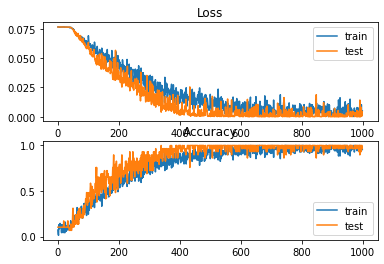

In [32]:
import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [33]:
# load best model
from tensorflow import keras
model = keras.models.load_model('/content/best_model.h5')

In [34]:
# test model
Z = model.predict(test_x)
result = Z
for i in range(len(result)):
  for j in range(len(result[i])):
    if result[i][j] == max(result[i]):
      result[i][j] = 1
    else:
      result[i][j] = 0
accuracy = model.evaluate(test_x, test_y)
print(accuracy[1]*100)

1/1 [==============================] - 0s 92ms/step - loss: 0.0039 - accuracy: 1.0000
100.0


In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn
tranform = []
for i in range(len(result)):
  for j in range(len(result[i])):
    if result[i][j] == 1:
      tranform.append(j)
y_true = test['labels'].tolist()
y_pred = tranform
CM = confusion_matrix(y_true, y_pred)

In [36]:
# precision , recall , f1 score and accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4',
                                                          'Class 5','Class 6','Class 7','Class 8',
                                                          'Class 9','Class 10','Class 11','Class 12']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00         3
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         2
     Class 4       1.00      1.00      1.00         3
     Class 5       1.00      1.00      1.00         2
     Class 6       1.00      1.00      1.00         2
     Class 7       1.00      1.00      1.00         3
     Class 8       1.00      1.00      1.00         2
     Class 9       1.00      1.00      1.00         2
    Class 10       1.00      1.00      1.00         2
    Class 11       1.00      1.00      1.00         2
    Class 12       1.00      1.00      1.00         3

    accuracy                           1.00        29
   m

In [37]:
#result 
print("Model predicted : ",y_pred)
print("Test labels : ",y_true)

Model predicted :  [0, 0, 0, 10, 10, 11, 11, 11, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9]
Test labels :  [0, 0, 0, 10, 10, 11, 11, 11, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9]
